In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
from mixed_naive_bayes import MixedNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [2]:
fertility = pd.read_csv("Fertility1.csv", sep=";")
tamaño=.30
tamañoTest=len(fertility)*tamaño
fertility.head(3)


,season,age,Ch_Disease,Accident,Surg_Int,H_Fever,Alcohol_Cons,Smoke,N_Hours,Diag
0,Fall,30,No,Yes,Yes,Greater th 3m,Once a week,Daily,6,Altered
1,Winter,31,No,Yes,No,No,Several times a week,Occasional,9,Normal
2,Winter,29,No,Yes,No,Greater th 3m,Hardly ever or never,Occasional,3,Normal


In [3]:
le = preprocessing.LabelEncoder()

num = fertility.select_dtypes(include=np.number)
nonum = fertility.select_dtypes(exclude=np.number)
nonum = nonum.drop(["Diag"], axis=1)
for columna in nonum:
    nonum[columna + "_cod"]=le.fit_transform(nonum.loc[:, columna])
    nonum = nonum.drop(columna, axis=1)
nonum.head(3)


,season_cod,Ch_Disease_cod,Accident_cod,Surg_Int_cod,H_Fever_cod,Alcohol_Cons_cod,Smoke_cod
0,0,0,1,1,0,2,0
1,3,0,1,0,2,4,2
2,3,0,1,0,0,1,2


In [4]:
X = pd.concat([num,nonum], axis=1)
y = fertility.loc[:,fertility.columns=="Diag"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tamaño, random_state=0, stratify=y)
y_expect = y_test


### Bernoulli Naive Bayes

In [5]:
BernNB = BernoulliNB(binarize = 0.1)
BernNB.fit(X_train, y_train)
y_pred = BernNB.predict(X_test)
B = accuracy_score(y_expect, y_pred)
Bn = tamañoTest - accuracy_score(y_expect, y_pred, normalize=False)

y_expect= y_expect["Diag"].to_numpy()
valores= [y_expect, y_pred]
tabla = pd.DataFrame(data=valores, index=["Esperado","Estimado"])
tabla= tabla.transpose()
tabla
frecuente=tabla["Esperado"].mode()
frecuente=str(frecuente[0])
def diferente(val):
    yellow = 'background-color: yellow'if val != frecuente else ""
    return yellow
tabla.style.applymap(diferente)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,Esperado,Estimado
0,Normal,Normal
1,Normal,Normal
2,Normal,Normal
3,Normal,Normal
4,Normal,Normal
5,Normal,Normal
6,Altered,Normal
7,Altered,Normal
8,Normal,Normal
9,Normal,Normal


### Multinomial Naive Bayes

In [6]:
MultiNB = MultinomialNB()
MultiNB.fit(X_train, y_train)
y_pred = MultiNB.predict(X_test)
M = accuracy_score(y_expect, y_pred)
Mn = tamañoTest - accuracy_score(y_expect, y_pred, normalize=False)
#print(accuracy_score(y_expect, y_predM))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Gaussian Naive Bayes

In [7]:
GaussNB=GaussianNB()
GaussNB.fit(X_train, y_train)
y_pred = GaussNB.predict(X_test)
G = accuracy_score(y_expect, y_pred)
Gn = tamañoTest - accuracy_score(y_expect, y_pred, normalize=False)
#print(accuracy_score(y_expect,y_predG))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


###  Mixed Naive Bayes

In [8]:
yCod = le.fit_transform(fertility.loc[:, "Diag"])
#tamaño=.20
X_train, X_test, y_train, y_test = train_test_split(X, yCod, test_size=tamaño, random_state=0, stratify=yCod)
y_expect = y_test

In [9]:
MixtoNB = MixedNB(categorical_features=[2, 3, 4, 5, 6, 7, 8])
MixtoNB.fit(X_train,y_train)
y_pred = MixtoNB.predict(X_test)
Mix =accuracy_score(y_test, y_pred)
MixG = tamañoTest - accuracy_score(y_expect, y_pred, normalize=False)

In [10]:
#y_expect= y_expect["Diag_cod"].to_numpy()
valores= [y_test, y_pred]
tabla = pd.DataFrame(data=valores, index=["Esperado","Estimado"])
tabla= tabla.transpose()
tabla
#frecuente=tabla["Esperado"].mode()
#frecuente=str(frecuente[0])
def diferente(val):
    yellow = 'background-color: yellow' if val == 0 else ""
    return yellow
tabla.style.applymap(diferente)

,Esperado,Estimado
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,0,1
7,0,1
8,1,1
9,1,1


In [11]:
cabeceras= ["BernoulliNB","MultinomialNB","GaussianNB","MixedNB"]
valores= [[B,Bn],[M,Mn],[G,Gn],[Mix,MixG]]
tabla = pd.DataFrame(data=valores, index=cabeceras, columns = ["% Aciertos", "No Achuntes"])


### Resumen

In [12]:
print("Con una proporción de muestra de: ", tamaño*100, "%")
tabla.sort_values(by="% Aciertos", ascending= False)

Con una proporción de muestra de:  30.0 %


,% Aciertos,No Achuntes
MixedNB,0.900000,3.0
BernoulliNB,0.866667,4.0
MultinomialNB,0.866667,4.0
GaussianNB,0.866667,4.0


[Text(0.5, 1.0, '% Aciertos'), Text(0.5, 0, '')]

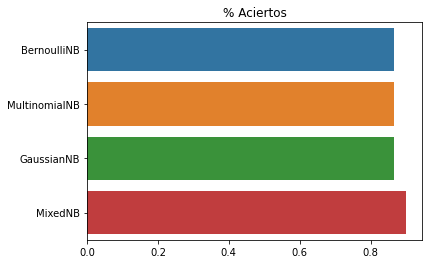

In [13]:
sb.barplot(y=cabeceras, x="% Aciertos", data=tabla, orient = 'h').set(title='% Aciertos',xlabel=None)